<a href="https://colab.research.google.com/github/NikTimosh/emissions_analysis/blob/main/GHG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. IMPORTING DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/CO2')


ghg = pd.read_csv('CW_HistoricalEmissions_CAIT.csv') 
ghg_all_data = pd.read_excel('ghg_all_data.xlsx')

Mounted at /content/gdrive


In [ ]:
ls

CW_HistoricalEmissions_CAIT.csv  ghg_all_data.xlsx  GHG.ipynb


In [ ]:
# Filtering rows so that all GHG indicated
ghg = ghg[ghg['Gas'] =='All GHG']
ghg.head()

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AFG,CAIT,Total excluding LUCF,All GHG,15.182846,15.102011,13.634687,13.463994,13.271733,13.476050,...,36.955463,44.906165,58.651861,66.749281,74.796108,84.619232,93.728621,95.372841,97.300113,98.920758
1,AFG,CAIT,Total including LUCF,All GHG,12.794043,12.713208,11.245884,11.075191,10.882930,11.087247,...,37.077364,45.028066,58.405642,66.503062,74.549889,84.373013,93.482402,95.527498,97.454770,99.075415
2,AFG,CAIT,Energy,All GHG,5.829497,5.334624,3.760858,3.422760,3.102594,2.783429,...,20.140819,26.056618,39.529423,47.592229,55.527034,64.675839,74.741644,75.932911,77.718177,79.580444
3,AFG,CAIT,Industrial Processes,All GHG,0.051879,0.054500,0.060111,0.062722,0.065343,0.067964,...,0.222971,0.248895,0.313896,0.378967,0.449909,0.534630,0.592081,0.758807,0.911544,1.064280
4,AFG,CAIT,Agriculture,All GHG,8.072853,8.396465,8.409491,8.486480,8.523959,8.957016,...,13.857023,15.788381,15.902260,15.777792,15.724861,16.220447,15.112568,15.315738,15.221951,14.744536


#**2. GLOBAL GHG EMISSIONS**

The Database provides emission time series from 1990 until 2018 for 194 countries, covering a total population of 7.5 billion inhabitants. 

In 2018, reported emissions totaled 47.5 thouthand MtCO2e (excluding the effects of land use and forestry), which represents a 55 percent increase since 1990. 



In [ ]:
# Filtering rows for world data analysis 
ghg_world = ghg[ghg['Country'] =='WORLD']  

# Filtering raw by sector
sector_short = ['Energy ', 'Industrial Processes ', 'Agriculture ', 'Waste ']
ghg_sector_short = ghg_world[ghg_world['Sector'].isin(sector_short)]
ghg_total = ghg_sector_short['2018'].sum()

# Emissions in 2018 
print('total GHG emissions in 2018 - '+ str(ghg_total) + ' MtCO2e')

# Emissions in 2018 compare to 1990

a = ghg_sector_short['1990'].sum()
b = ghg_sector_short['2018'].sum()

print(str(100*(b-a)/a) + ' % of increasing') 


total GHG emissions in 2018 - 47552.141768 MtCO2e
54.70843071879604 % of increasing


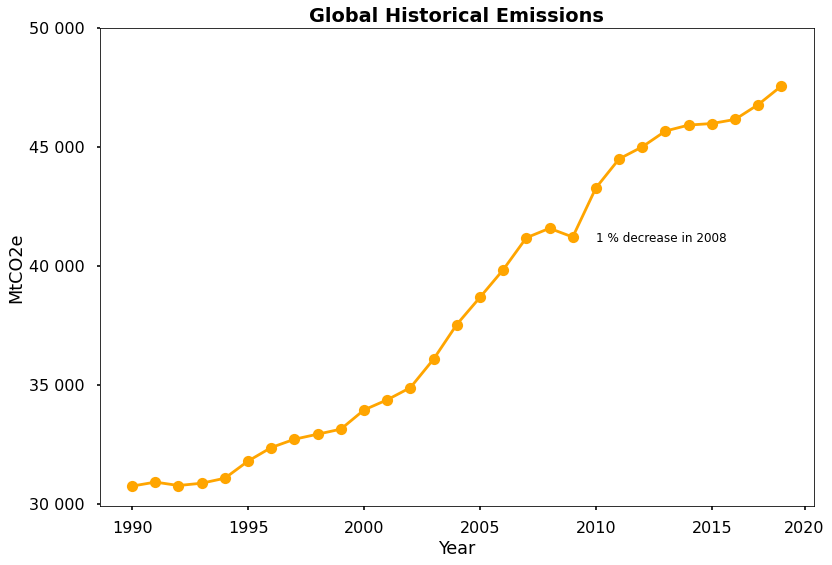

In [ ]:
# Unpivotting a table to prepare tidy data
ghg_tidy = pd.melt(frame = ghg_sector_short, id_vars = ['Country', 'Source', 'Sector', 'Gas'], var_name = 'Year', value_name = 'GHG')

# Calculate total GHG for each year
ghg_total_year = ghg_tidy.groupby('Year')['GHG'].sum()

# Developing a plot
plt.style.use('seaborn-poster')
plt.plot(ghg_total_year,color = 'orange', marker = 'o')

plt.xlabel('Year') 
plt.ylabel('MtCO2e') 

plt.yticks([30000,35000,40000,45000,50000],
           ['30 000','35 000','40 000','45 000','50 000'])
plt.xticks(['1990','1995','2000','2005','2010','2015','2020'])
plt.title('Global Historical Emissions', fontweight = 'bold')

plt.text(20,41000, '1 % decrease in 2008', fontsize = 12)

plt.show()

#**3. SECTORS**

In 2018, Energy sector (including fuels used by transport and buildings) represent the largest source of greenhouse gas emissions worldwide (78.3 %), followed by agriculture (12.2 %), Industrial Processes (6.1%) and Waste (3.4 %). 



In [ ]:
ghg_short = ghg_sector_short.copy()

ghg_short['Share, %'] = 100 * ghg_short['2018'] / ghg_short['2018'].sum()
ghg_short[['Country', 'Sector', '2018', 'Share, %']].sort_values('Share, %', ascending = False)

,Country,Sector,2018,"Share, %"
8802,WORLD,Energy,37224.952010,78.282388
8804,WORLD,Agriculture,5817.648406,12.234251
8803,WORLD,Industrial Processes,2902.681101,6.104207
8805,WORLD,Waste,1606.860251,3.379154


To be more specific, the five most emitting sub-sectors are responsible for 33 % (Electricity / Heat), 17 % (Transportation) and 13 % (Manufacturing/Construction) and 12 % (Agriculture) of the total CO2-eq emissions, as can be seen in the Table below. 

In [ ]:
sector_long = ['Manufacturing/Construction ', 'Transportation ', 'Fugitive Emissions ', 'Other Fuel Combustion ', 'Building', 'Electricity/Heat ', 'Industrial Processes ', 'Agriculture ', 'Waste ']
ghg_sector_long = ghg_world[ghg_world['Sector'].isin(sector_long)]

ghg_sector_long = ghg_sector_long.copy()
ghg_sector_long['Share, %'] = 100 * ghg_sector_long['2018'] / ghg_sector_long['2018'].sum()
ghg_sector_long[['Country', 'Sector', '2018', 'Share, %']].sort_values('Share, %', ascending = False)

,Country,Sector,2018,"Share, %"
8808,WORLD,Electricity/Heat,15590.954000,32.787070
8810,WORLD,Transportation,8257.734000,17.365641
8809,WORLD,Manufacturing/Construction,6158.316000,12.950660
8804,WORLD,Agriculture,5817.648406,12.234251
8803,WORLD,Industrial Processes,2902.681101,6.104207
8813,WORLD,Fugitive Emissions,2883.391101,6.063641
8811,WORLD,Building,2882.535000,6.061841
8805,WORLD,Waste,1606.860251,3.379154
8812,WORLD,Other Fuel Combustion,1452.021913,3.053536


In [ ]:
ghg_sector_compare = ghg_sector_long.copy()

g = ghg_sector_compare['1990']
d = ghg_sector_compare['2018']

ghg_sector_compare['Compare'] = 100*(d-g)/g
ghg_sector_compare[['Sector', '1990', '2018','Compare']]

,Sector,1990,2018,Compare
8803,Industrial Processes,1010.435346,2902.681101,187.270345
8804,Agriculture,4997.827144,5817.648406,16.403554
8805,Waste,1364.403874,1606.860251,17.770133
8808,Electricity/Heat,8596.172000,15590.954000,81.370894
8809,Manufacturing/Construction,3955.390000,6158.316000,55.694280
8810,Transportation,4609.038000,8257.734000,79.163938
8811,Building,2596.847000,2882.535000,11.001341
8812,Other Fuel Combustion,1353.121604,1452.021913,7.309048
8813,Fugitive Emissions,2253.384584,2883.391101,27.958233


The 30-year evolution of the global emissions is illustrated in the following figures.

In [ ]:
ghg_tidy_short = ghg_tidy[['Sector','Year', 'GHG']]
ghg_tidy_short.head()

,Sector,Year,GHG
0,Energy,1990,23363.953190
1,Industrial Processes,1990,1010.435346
2,Agriculture,1990,4997.827144
3,Waste,1990,1364.403874
4,Energy,1991,23506.227170


<function matplotlib.pyplot.show>

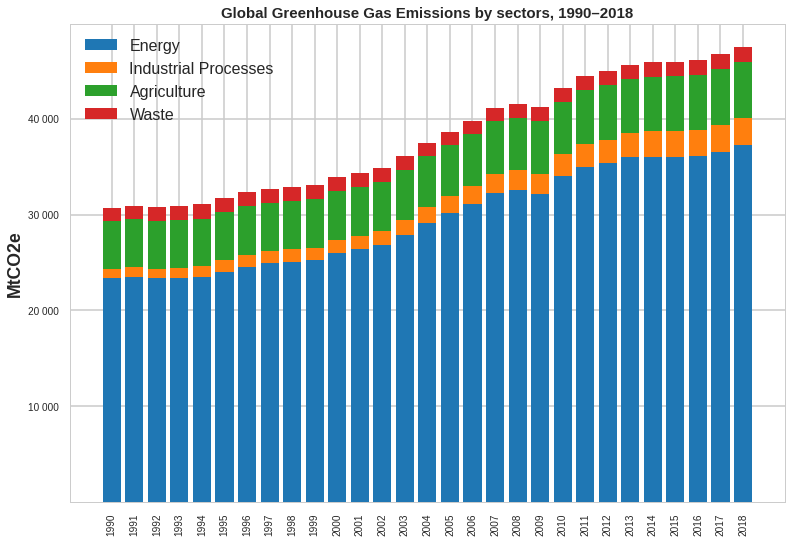

In [ ]:
plt.style.use('seaborn-whitegrid')

# Energy sector - ghg_tidy_energy['GHG']

ghg_tidy_energy = ghg_tidy_short[ghg_tidy_short['Sector'] =='Energy ']
energy_sector = np.array(ghg_tidy_energy['GHG'])
plt.bar(ghg_tidy_energy['Year'], energy_sector, label = 'Energy')

# Industrial Processes - ghg_tidy_industrial_processes['GHG']

ghg_tidy_industrial_processes = ghg_tidy_short[ghg_tidy_short['Sector'] =='Industrial Processes ']
industrial_sector = np.array(ghg_tidy_industrial_processes['GHG'])
plt.bar(ghg_tidy_industrial_processes['Year'], industrial_sector, bottom = energy_sector, label = 'Industrial Processes')

# Agriculture - ghg_tidy_agriculture['GHG']

ghg_tidy_agriculture = ghg_tidy_short[ghg_tidy_short['Sector'] =='Agriculture ']
agriculture_sector = np.array(ghg_tidy_agriculture['GHG'])
plt.bar(ghg_tidy_agriculture['Year'], agriculture_sector, bottom = energy_sector + industrial_sector, label = 'Agriculture')

# Waste - ghg_tidy_waste['GHG']

ghg_tidy_waste = ghg_tidy_short[ghg_tidy_short['Sector'] =='Waste ']
waste_sector = np.array(ghg_tidy_waste['GHG'])
plt.bar(ghg_tidy_waste['Year'], waste_sector, bottom = energy_sector + industrial_sector + agriculture_sector, label = 'Waste')

plt.ylabel('MtCO2e',fontweight = 'bold')

plt.xticks(rotation=90, fontsize = 10)
plt.yticks([10000,20000,30000,40000],
           ['10 000','20 000','30 000','40 000'], fontsize = 10)


plt.title('Global Greenhouse Gas Emissions by sectors, 1990–2018',fontsize = 15, fontweight = 'bold')
plt.legend()


plt.show

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

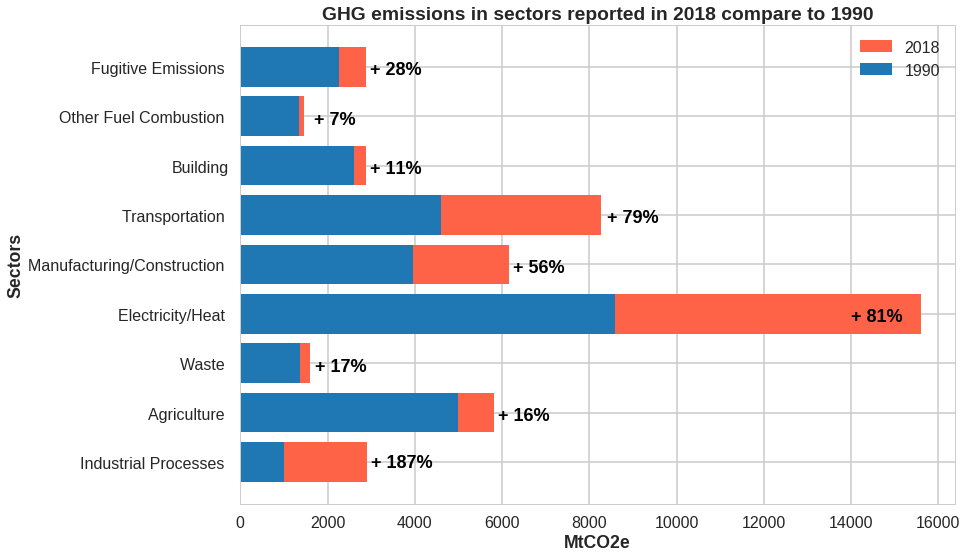

In [ ]:
plt.style.use('seaborn-whitegrid')

plt.barh(ghg_sector_long['Sector'], ghg_sector_long['2018'], label = '2018', color = 'tomato')
plt.barh(ghg_sector_long['Sector'], ghg_sector_long['1990'], label = '1990')
plt.legend()
plt.title('GHG emissions in sectors reported in 2018 compare to 1990', fontweight = 'bold')
plt.xlabel('MtCO2e',fontweight = 'bold')
plt.ylabel('Sectors',fontweight = 'bold')


plt.text(3003,-0.1,'+ 187%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(5917,0.85,'+ 16%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(1707,1.85,'+ 17%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(14000,2.85,'+ 81%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(6258,3.85,'+ 56%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(8400,4.85,'+ 79%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(2982,5.85,'+ 11%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(1700,6.85,'+ 7%', color = 'black', fontsize = 18,fontweight = 'bold')
plt.text(2983,7.85,'+ 28%', color = 'black', fontsize = 18,fontweight = 'bold')

plt.show()

#**4. COUNTRIES**

In [ ]:
# remove World and EYY and filter columns
not_countries = ['EUU', 'WORLD']
ghg_country = ghg.loc[(~ghg['Country'].isin(not_countries)) & (ghg['Sector'].isin(sector_short))]

#2018 dataset for all countries
ghg_country = ghg_country.groupby('Country')[['2018']].sum()
ghg_country = ghg_country.sort_values('2018', ascending = False)

# Share of each country
ghg_country['Share, %'] = 100 * ghg_country['2018'] / ghg_country['2018'].sum()

# Cumulative share
ghg_country['cum_Share, %'] = ghg_country['Share, %'].cumsum()
ghg_country[ghg_country['cum_Share, %'] <60]

,2018,"Share, %","cum_Share, %"
Country,,,
CHN,12355.238544,26.933021,26.933021
USA,6023.617235,13.130804,40.063825
IND,3374.985019,7.357085,47.420910
RUS,2543.399863,5.544324,52.965234
JPN,1186.766732,2.587017,55.552251
BRA,1032.638840,2.251036,57.803287
IDN,969.579218,2.113573,59.916860


#**5. GDP AND POPULATION**

In [ ]:
ghg_all_data

,Country Name,Country,GHG (2018),population (2018),gdp (2018),Continent
0,Afghanistan,AFG,98.920758,37172386,1.835388e+10,Asia
1,Angola,AGO,79.729115,30809762,1.010000e+11,Africa
2,Albania,ALB,10.079701,2866376,1.514702e+10,Europe
3,Andorra,AND,0.587181,77006,3.218316e+09,Europe
4,United Arab Emirates,ARE,263.239421,9630959,4.220000e+11,Asia
...,...,...,...,...,...,...
185,Samoa,WSM,0.691249,196130,8.214961e+08,Oceania
186,"Yemen, Rep.",YEM,21.762494,28498687,2.348627e+10,Asia
187,South Africa,ZAF,513.435837,57792520,3.680000e+11,Africa
188,Zambia,ZMB,40.670140,17351822,2.631214e+10,Africa


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


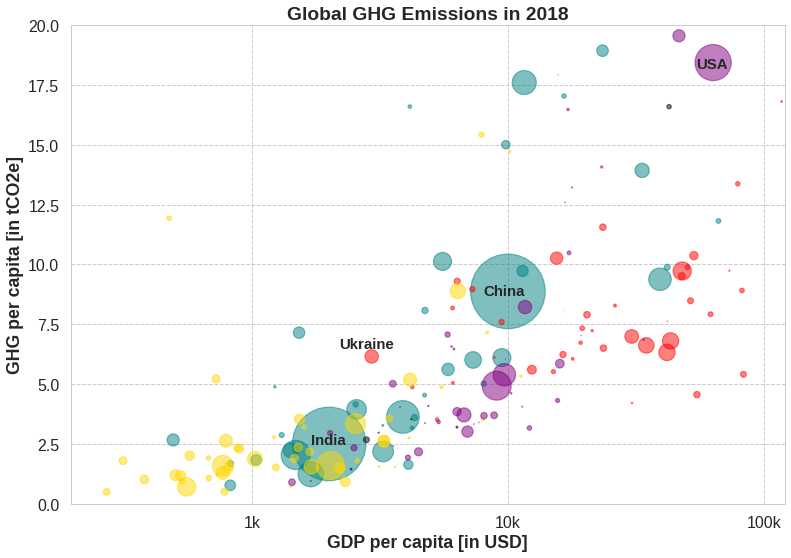

In [ ]:
ghg_all_data['ghg per capita'] = 10**6 * ghg_all_data['GHG (2018)'] / ghg_all_data['population (2018)']
ghg_all_data['gdp per capita'] = ghg_all_data['gdp (2018)'] / ghg_all_data['population (2018)']

ghg_all_data.sort_values('ghg per capita', ascending = False)

ghg_all_data_asia = ghg_all_data[ghg_all_data['Continent']=='Asia']
pop_asia = ghg_all_data_asia['population (2018)']/250000

ghg_all_data_europe = ghg_all_data[ghg_all_data['Continent']=='Europe']
pop_europe = ghg_all_data_europe['population (2018)']/250000

ghg_all_data_africa = ghg_all_data[ghg_all_data['Continent']=='Africa']
pop_africa = ghg_all_data_africa['population (2018)']/250000

ghg_all_data_americas = ghg_all_data[ghg_all_data['Continent']=='Americas']
pop_americas = ghg_all_data_americas['population (2018)']/250000

ghg_all_data_oceania = ghg_all_data[ghg_all_data['Continent']=='Oceania']
pop_oceania = ghg_all_data_oceania['population (2018)']/250000

from matplotlib import pyplot as plt
plt.style.use('seaborn-poster')

plt.scatter(ghg_all_data_asia['gdp per capita'], ghg_all_data_asia['ghg per capita'], alpha = 0.5,label = 'Asia', s = pop_asia, c = 'Teal',  linewidths = 1.2)
plt.scatter(ghg_all_data_europe['gdp per capita'], ghg_all_data_europe['ghg per capita'], alpha = 0.5, label = 'Europe', s = pop_europe, c = 'Red', linewidths = 1.2)
plt.scatter(ghg_all_data_africa['gdp per capita'], ghg_all_data_africa['ghg per capita'], alpha = 0.5, label = 'Africa', s = pop_africa, c = 'Gold', linewidths = 1.2)
plt.scatter(ghg_all_data_americas['gdp per capita'], ghg_all_data_americas['ghg per capita'], alpha = 0.5, label = 'Americas', s = pop_americas, c = 'Purple', linewidths = 1.2)
plt.scatter(ghg_all_data_oceania['gdp per capita'], ghg_all_data_oceania['ghg per capita'], alpha = 0.5, label = 'Oceania' , s = pop_oceania, c = 'black', linewidths = 1.2)

plt.title('Global GHG Emissions in 2018', fontweight = 'bold')
plt.xlabel('GDP per capita [in USD]',fontweight = 'bold')
plt.ylabel('GHG per capita [in tCO2e]',fontweight = 'bold')

plt.xscale('log') 

plt.xlim(0, 120000)
plt.ylim(0, 20)

plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

plt.text(1700, 2.5, 'India', fontweight = 'bold', fontsize = 15)
plt.text(8000, 8.7, 'China', fontweight = 'bold', fontsize = 15)
plt.text(54000, 18.2, 'USA', fontweight = 'bold', fontsize = 15)
plt.text(2200, 6.5, 'Ukraine', fontweight = 'bold', fontsize = 15)

plt.grid(linestyle = '--', linewidth = 1)
plt.show()